In [1]:
from pyspark.sql import SparkSession
Spark = (SparkSession.builder.appName("capstone")\
        .config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083")\
        .enableHiveSupport().getOrCreate())

In [5]:
departments = Spark.sql("select * from capstone_hadoop_rk.departments")

In [191]:
departments.createOrReplaceTempView('departments')

In [7]:
titles = Spark.sql("select * from capstone_hadoop_rk.titles")

In [192]:
titles.createOrReplaceTempView('titles')

In [8]:
salaries = Spark.sql("select * from capstone_hadoop_rk.salaries")

In [193]:
salaries.createOrReplaceTempView('salaries')

In [9]:
department_managers = Spark.sql("select * from capstone_hadoop_rk.department_managers")

In [194]:
department_managers.createOrReplaceTempView('department_managers')

In [200]:
department_employees = Spark.sql("select * from capstone_hadoop_rk.department_employees")

In [201]:
department_employees.createOrReplaceTempView('department_employees')

In [197]:
employees = Spark.sql("select * from capstone_hadoop_rk.employees")

In [198]:
employees.createOrReplaceTempView('employees')

# Analysis

## 1. A List showing employee number, last_name, first name, sex and salary for each employee.

In [18]:
Spark.sql("SELECT e.emp_no, e.last_name, e.sex, s.salary\
            FROM capstone_hadoop_rk.employees e \
            INNER JOIN\
            capstone_hadoop_rk.salaries s on s.emp_no = e.emp_no").show()

+------+-----------+---+------+
|emp_no|  last_name|sex|salary|
+------+-----------+---+------+
| 10001|    Facello|  M| 60117|
| 10002|     Simmel|  F| 65828|
| 10003|    Bamford|  M| 40006|
| 10004|    Koblick|  M| 40054|
| 10005|   Maliniak|  M| 78228|
| 10006|    Preusig|  F| 40000|
| 10007|  Zielinski|  F| 56724|
| 10008|   Kalloufi|  M| 46671|
| 10009|       Peac|  F| 60929|
| 10010|   Piveteau|  F| 72488|
| 10011|      Sluis|  F| 42365|
| 10012|  Bridgland|  M| 40000|
| 10013|     Terkki|  M| 40000|
| 10014|      Genin|  M| 46168|
| 10015|  Nooteboom|  M| 40000|
| 10016|Cappelletti|  M| 70889|
| 10017|  Bouloucos|  F| 71380|
| 10018|       Peha|  F| 55881|
| 10019|    Haddadi|  M| 44276|
| 10020|    Warwick|  M| 40000|
+------+-----------+---+------+
only showing top 20 rows



## 2. A list showing first name, last_name and hire date for employees who were hired in 1986.

In [22]:
Spark.sql('select first_name, last_name, hire_date from capstone_hadoop_rk.employees where hire_date LIKE "%1986" ').show()

+----------+------------+----------+
|first_name|   last_name| hire_date|
+----------+------------+----------+
|    Georgi|     Facello| 6/26/1986|
|     Parto|     Bamford| 8/28/1986|
| Chirstian|     Koblick| 12/1/1986|
|    Sanjiv|    Zschoche|  2/4/1986|
|      Kwee|    Schusler| 2/26/1986|
|   Kshitij|        Gils| 3/27/1986|
|  Zhongwei|       Rosen|10/30/1986|
|   Xinglin|     Eugenio|  9/8/1986|
| Sudharsan|Flasterstein| 8/12/1986|
|    Kendra|     Hofting| 3/14/1986|
|    Hilari|      Morton| 7/15/1986|
|     Akemi|       Birch| 12/2/1986|
|    Lunjin|      Giveon| 10/2/1986|
|    Xuejia|      Ullian| 8/22/1986|
|   Chikara|    Rissland| 1/23/1986|
|  Domenick|    Peltason| 3/14/1986|
|    Zissis|    Pintelas| 2/11/1986|
|     Perry|   Shimshoni| 9/18/1986|
|  Kazuhito| Encarnacion| 8/21/1986|
|   Xiadong|       Perry| 11/5/1986|
+----------+------------+----------+
only showing top 20 rows



## 3. A list showing the manager of each department with the following information: department number, department name, the manager's employee number, last name, first name.

In [24]:
Spark.sql('SELECT \
    d.dept_no, \
    d.dept_name, \
    dm.emp_no, \
    e.last_name, \
    e.first_name \
FROM capstone_hadoop_rk.departments d \
JOIN capstone_hadoop_rk.department_managers dm \
ON d.dept_no = dm.dept_no \
JOIN capstone_hadoop_rk.employees e \
ON dm.emp_no = e.emp_no').show()

+-------+--------------------+------+------------+-----------+
|dept_no|           dept_name|emp_no|   last_name| first_name|
+-------+--------------------+------+------------+-----------+
|   d001|         "Marketing"|110022|  Markovitch|  Margareta|
|   d001|         "Marketing"|110039|    Minakawa|   Vishwani|
|   d002|           "Finance"|110085|       Alpin|       Ebru|
|   d002|           "Finance"|110114|  Legleitner|      Isamu|
|   d003|   "Human Resources"|110183|Ossenbruggen|    Shirish|
|   d003|   "Human Resources"|110228|     Sigstam|    Karsten|
|   d004|        "Production"|110303|     Wegerle|  Krassimir|
|   d004|        "Production"|110344|       Cools|     Rosine|
|   d004|        "Production"|110386|      Kieras|       Shem|
|   d004|        "Production"|110420|    Ghazalie|      Oscar|
|   d005|       "development"|110511|    Hagimont|   DeForest|
|   d005|       "development"|110567|    DasSarma|       Leon|
|   d006|"Quality Management"|110725|     Onuegbe|  Pet

## 4. List the department of each employee with the following information:	employee number, last name, first name, and department name.

In [25]:
Spark.sql('SELECT \
    de.emp_no, \
    e.last_name, \
    e.first_name, \
    d.dept_name \
FROM capstone_hadoop_rk.department_employees de \
JOIN capstone_hadoop_rk.employees e \
ON de.emp_no = e.emp_no \
JOIN capstone_hadoop_rk.departments d \
ON de.dept_no = d.dept_no').show()

+------+-----------+----------+--------------------+
|emp_no|  last_name|first_name|           dept_name|
+------+-----------+----------+--------------------+
| 10001|    Facello|    Georgi|       "development"|
| 10002|     Simmel|   Bezalel|             "Sales"|
| 10003|    Bamford|     Parto|        "Production"|
| 10004|    Koblick| Chirstian|        "Production"|
| 10005|   Maliniak|   Kyoichi|   "Human Resources"|
| 10006|    Preusig|    Anneke|       "development"|
| 10007|  Zielinski|   Tzvetan|          "Research"|
| 10008|   Kalloufi|    Saniya|       "development"|
| 10009|       Peac|    Sumant|"Quality Management"|
| 10010|   Piveteau| Duangkaew|"Quality Management"|
| 10010|   Piveteau| Duangkaew|        "Production"|
| 10011|      Sluis|      Mary|  "Customer Service"|
| 10012|  Bridgland|  Patricio|       "development"|
| 10013|     Terkki| Eberhardt|   "Human Resources"|
| 10014|      Genin|     Berni|       "development"|
| 10015|  Nooteboom|  Guoxiang|          "Rese

## 5. A list showing first name, last name, and sex of employees whose first name is 'Hercules'	and last name begin with 'B'

In [28]:
Spark.sql('SELECT \
    first_name, \
    last_name, \
    sex \
FROM capstone_hadoop_rk.employees \
WHERE first_name = "Hercules"  \
AND last_name LIKE "B%" ').show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|   Benzmuller|  M|
|  Hercules|      Brendel|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baer|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|      Basagni|  M|
|  Hercules|        Biran|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Bisiani|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|        Biron|  F|
|  Hercules|      Buchter|  M|
|  Hercules|         Bain|  F|
|  Hercules|         Bahr|  M|
|  Hercules|         Baak|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Berstel|  F|
+----------+-------------+---+



## 6. A list showing all employees in the Sales department, including their employee number, last name, first name, department name.

In [30]:
Spark.sql("""
    SELECT
    de.dept_no,
    e.last_name,
    e.first_name,
    d.dept_name
FROM capstone_hadoop_rk.department_employees de
JOIN
capstone_hadoop_rk.employees e on de.emp_no = e.emp_no
JOIN
capstone_hadoop_rk.departments d on de.dept_no = d.dept_no
WHERE d.dept_name = '"Sales"'
""").show()

+-------+------------+----------+---------+
|dept_no|   last_name|first_name|dept_name|
+-------+------------+----------+---------+
|   d007|      Simmel|   Bezalel|  "Sales"|
|   d007| Cappelletti|  Kazuhito|  "Sales"|
|   d007|        Swan|     Bader|  "Sales"|
|   d007|      Lenart|       Uri|  "Sales"|
|   d007|      Dredge|   Yinghua|  "Sales"|
|   d007|    Zschoche|    Sanjiv|  "Sales"|
|   d007| Billingsley|  Breannda|  "Sales"|
|   d007|      Herber|       Tse|  "Sales"|
|   d007|     Brattka|  Charlene|  "Sales"|
|   d007|     Eugenio|   Xinglin|  "Sales"|
|   d007|    Syrzycki|  Jungsoon|  "Sales"|
|   d007|Flasterstein| Sudharsan|  "Sales"|
|   d007|     Desikan|   Sailaja|  "Sales"|
|   d007|      Morton|    Hilari|  "Sales"|
|   d007|     Sullins|    Valter|  "Sales"|
|   d007|      Heyers|     Perla|  "Sales"|
|   d007|        Baca|      Dung|  "Sales"|
|   d007|     Hiltgen|     Syozo|  "Sales"|
|   d007|    Pintelas|    Zissis|  "Sales"|
|   d007|       Azumi|    Douadi

## 7. A list showing all employees in the sales and development departments including their employee number, last name, first name and department name.

In [31]:
Spark.sql("""
SELECT
    de.emp_no,
    e.last_name,
    e.first_name,
    d.dept_name
FROM capstone_hadoop_rk.department_employees de
JOIN
capstone_hadoop_rk.employees e on de.emp_no = e.emp_no
JOIN
capstone_hadoop_rk.departments d on de.dept_no = d.dept_no
WHERE d.dept_name = '"Sales"' OR d.dept_name = '"development"'
""").show()

+------+-----------+----------+-------------+
|emp_no|  last_name|first_name|    dept_name|
+------+-----------+----------+-------------+
| 10001|    Facello|    Georgi|"development"|
| 10002|     Simmel|   Bezalel|      "Sales"|
| 10006|    Preusig|    Anneke|"development"|
| 10008|   Kalloufi|    Saniya|"development"|
| 10012|  Bridgland|  Patricio|"development"|
| 10014|      Genin|     Berni|"development"|
| 10016|Cappelletti|  Kazuhito|      "Sales"|
| 10018|       Peha|  Kazuhide|"development"|
| 10021|       Erde|     Ramzi|"development"|
| 10022|     Famili|    Shahaf|"development"|
| 10023| Montemayor|     Bojan|"development"|
| 10025|     Heyers| Prasadram|"development"|
| 10027|    Reistad|    Divier|"development"|
| 10028|   Tempesti|  Domenick|"development"|
| 10031|     Joslin|   Karsten|"development"|
| 10034|       Swan|     Bader|      "Sales"|
| 10037|   Makrucki|   Pradeep|"development"|
| 10040|    Meriste|     Weiyi|"development"|
| 10041|     Lenart|       Uri|   

## 8. A list showing the frequency count of employee last name, in descending order (i.e., how many employees share each last name)

In [33]:
Spark.sql("""
    SELECT
    last_name,
    count(last_name) as Frequency
FROM capstone_hadoop_rk.employees
GROUP BY last_name
ORDER BY count(last_name) DESC
""").show()

+-----------+---------+
|  last_name|Frequency|
+-----------+---------+
|       Baba|      226|
|     Gelosh|      223|
|      Coorg|      223|
|     Farris|      222|
|    Sudbeck|      222|
|     Adachi|      221|
|     Osgood|      220|
|     Neiman|      218|
|     Masada|      218|
|    Mandell|      218|
|Boudaillier|      217|
|    Wendorf|      217|
|     Mahnke|      216|
|    Solares|      216|
|     Pettis|      216|
|   Cummings|      216|
|     Emmart|      215|
|   Collette|      215|
|   Birjandi|      215|
|    Kulisch|      215|
+-----------+---------+
only showing top 20 rows



## 9. Histogram to show the salary distribution among the employee.

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
Spark.sql("""
    SELECT 
    bins,
    count(bins) as salary_range
from capstone_hadoop_rk.bins
GROUP BY bins
ORDER BY salary_range DESC
""").show()

+---------+------------+
|     bins|salary_range|
+---------+------------+
|  40k-50k|      158465|
|  50k-60k|       57915|
|  60k-70k|       41413|
|  70k-80k|       24814|
|  80k-90k|       11845|
| 90k-100k|        4284|
|100k-110k|        1069|
|110k-120k|         195|
|120k-130k|          24|
+---------+------------+



In [75]:
Bins = Spark.sql("""select * from capstone_hadoop_rk.bins""")

In [89]:
Sal = salaries.toPandas()

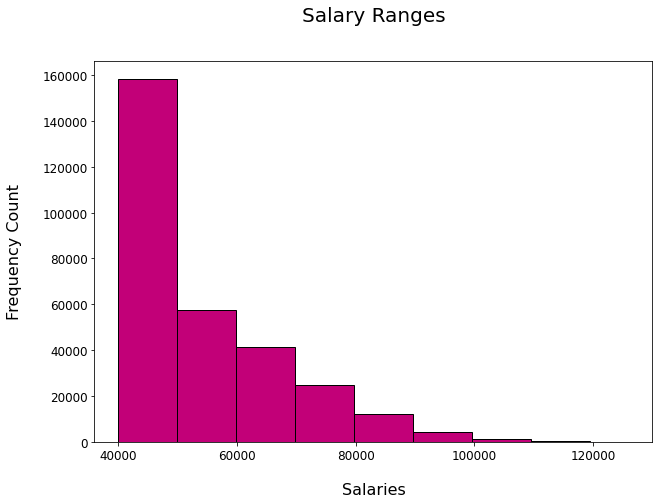

<Figure size 720x504 with 0 Axes>

In [95]:
plt.rcParams['figure.figsize']=(10,7)
plt.hist(Sal['salary'],bins=9,color='xkcd:magenta',alpha=1,edgecolor='black')
plt.title('Salary Ranges',fontsize=20,pad=40)
plt.xlabel('Salaries',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency Count',fontsize=16,color='black',labelpad=20)
plt.xlim(36000,130000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Save Figure
plt.savefig("employee_salary_ranges.png")

# Show plot
plt.show()

## 10. Bar graph to show Avg salary per title (designation)

In [97]:
Avg_Salary = Spark.sql("""
SELECT
    t.title,
    avg(s.salary) as Avg_Salary
FROM capstone_hadoop_rk.employees e
JOIN capstone_hadoop_rk.titles t
ON t.title_id = e.emp_title_id
JOIN capstone_hadoop_rk.salaries s
ON s.emp_no = e.emp_no
GROUP BY t.title
""")

In [98]:
Avg_Salary.show()

+------------------+------------------+
|             title|        Avg_Salary|
+------------------+------------------+
|             Staff| 58465.38285033152|
|Assistant Engineer| 48564.43444730077|
|      Senior Staff| 58550.17270435993|
|   Senior Engineer| 48506.79987109579|
|          Engineer|48535.336511426336|
|           Manager|51531.041666666664|
|  Technique Leader| 48582.89609189332|
+------------------+------------------+



In [99]:
Avg_Salary = Avg_Salary.toPandas()

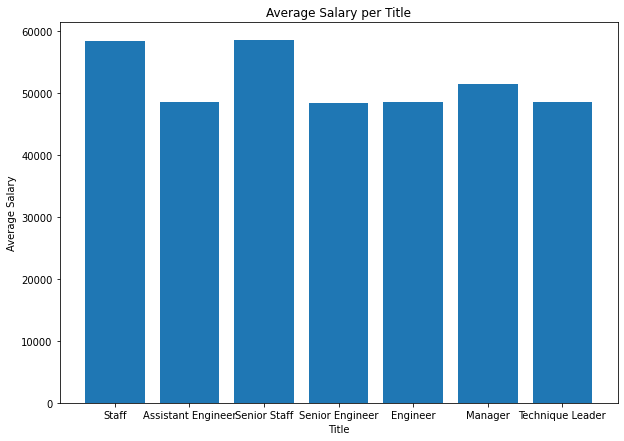

In [101]:
plt.rcParams['figure.figsize']=(10,7)

plt.bar(Avg_Salary['title'], Avg_Salary['Avg_Salary'])
plt.xlabel("Title")
plt.ylabel("Average Salary")
plt.title("Average Salary per Title")
plt.show()

## 11. Calculate employee tenure and show tenure distribution among the employees.

In [157]:
from pyspark.sql.functions import *

In [172]:
Spark.sql("""
SELECT
    emp_no,
    first_name,
    last_name,
    2000-year(hire_date) as tenure
FROM emp_final
order by tenure desc""").show()

+------+----------+------------+------+
|emp_no|first_name|   last_name|tenure|
+------+----------+------------+------+
|255100|  Hironoby|    Stavenow|    15|
|255314|     Zeydy|   Magalhaes|    15|
|255132|     Yifei|    Turnbull|    15|
|255010|     Taiji|       Denis|    15|
|255137|     Alagu|      Rajala|    15|
|255021|    Ashish|     Crouzet|    15|
|255143|    Jessie|     Bierman|    15|
|255063|    Howell|    Edelhoff|    15|
|255151|    Rasiah|    Reghbati|    15|
|255084|    Basant|       Yurov|    15|
|255157|     Saeed|      Zlotek|    15|
|255207|       Fun|Ossenbruggen|    15|
|255210|   Arlette|    Cheshire|    15|
|255022|    Divier|     Barriga|    15|
|255218|   Izaskun|     Kulisch|    15|
|255059|       Tse|   Kawashima|    15|
|255220|  Kwangsub|      Renear|    15|
|255087|    Gererd|     Milicic|    15|
|255224|     Feiyu|      Melter|    15|
|255176|     Lijia|    Standera|    15|
+------+----------+------------+------+
only showing top 20 rows



In [185]:
Spark.sql("""
    SELECT
    e.emp_no,
        CASE
            WHEN 2000-year(hire_date) <= 15 AND 2000-year(hire_date) >=10 THEN '10+ years exp'
            WHEN 2000-year(hire_date) <= 10 AND 2000-year(hire_date) >=5 THEN '5-10 years exp'
            WHEN 2000-year(hire_date) <= 5  AND 2000-year(hire_date) >=1 THEN '1-5 years exp'
            ELSE 'FRESHER'
            END as Experience
        FROM emp_final e
JOIN capstone_hadoop_rk.titles t
ON t.title_id = e.emp_title_id
""").show()

+------+--------------+
|emp_no|    Experience|
+------+--------------+
| 10001| 10+ years exp|
| 10002| 10+ years exp|
| 10003| 10+ years exp|
| 10004| 10+ years exp|
| 10005| 10+ years exp|
| 10006| 10+ years exp|
| 10007| 10+ years exp|
| 10008|5-10 years exp|
| 10009| 10+ years exp|
| 10010| 10+ years exp|
| 10011| 10+ years exp|
| 10012|5-10 years exp|
| 10013| 10+ years exp|
| 10014| 10+ years exp|
| 10015| 10+ years exp|
| 10016|5-10 years exp|
| 10017|5-10 years exp|
| 10018| 10+ years exp|
| 10019| 1-5 years exp|
| 10020|5-10 years exp|
+------+--------------+
only showing top 20 rows



# Addition Analysis

## 1. The tenure for each Title

In [180]:
Spark.sql("""
SELECT
    t.title,
    2000-year(e.hire_date) as tenure
FROM emp_final e
JOIN capstone_hadoop_rk.titles t
ON t.title_id = e.emp_title_id
GROUP BY tenure, t.title 
order by tenure desc""").show()

+------------------+------+
|             title|tenure|
+------------------+------+
|   Senior Engineer|    15|
|           Manager|    15|
|Assistant Engineer|    15|
|          Engineer|    15|
|  Technique Leader|    15|
|             Staff|    15|
|      Senior Staff|    15|
|             Staff|    14|
|   Senior Engineer|    14|
|Assistant Engineer|    14|
|           Manager|    14|
|          Engineer|    14|
|  Technique Leader|    14|
|      Senior Staff|    14|
|      Senior Staff|    13|
|Assistant Engineer|    13|
|             Staff|    13|
|          Engineer|    13|
|   Senior Engineer|    13|
|  Technique Leader|    13|
+------------------+------+
only showing top 20 rows



## 2. Employees left the organization and there respective Tenure and Title when they left

In [229]:
Spark.sql("""
    select
    t.title,
    e.emp_no as Employees_left,
    2000-year(e.hire_date) as Tenure
    from emp_final e
    inner join titles t
    on t.title_id = e.emp_title_id
    where left_ = 1
""").show()

+----------------+--------------+------+
|           title|Employees_left|Tenure|
+----------------+--------------+------+
| Senior Engineer|         10001|    14|
|           Staff|         10007|    11|
|        Engineer|         10022|     5|
| Senior Engineer|         10031|     9|
| Senior Engineer|         10047|    11|
| Senior Engineer|         10062|     9|
|Technique Leader|         10074|    10|
|           Staff|         10082|    10|
|           Staff|         10088|    12|
|        Engineer|         10102|     6|
| Senior Engineer|         10127|    11|
|    Senior Staff|         10141|     7|
| Senior Engineer|         10158|    14|
|           Staff|         10187|     9|
|           Staff|         10210|     6|
| Senior Engineer|         10212|    10|
|           Staff|         10216|    13|
| Senior Engineer|         10218|     3|
|        Engineer|         10229|    13|
|           Staff|         10232|     8|
+----------------+--------------+------+
only showing top

## 3. Total number of projects in every department

In [220]:
Spark.sql("""
    select
        d.dept_name,
        sum(no_of_projects) as Total_Projects
    from emp_final e
    inner join department_employees de
    on e.emp_no = de.emp_no
    inner join departments d
    on d.dept_no = de.dept_no
    group by d.dept_name
    order by Total_Projects desc
""").show()

+--------------------+--------------+
|           dept_name|Total_Projects|
+--------------------+--------------+
|       "development"|        471220|
|        "Production"|        404209|
|             "Sales"|        288313|
|  "Customer Service"|        129248|
|          "Research"|        117095|
|         "Marketing"|        111398|
|"Quality Management"|        110863|
|   "Human Resources"|         97697|
|           "Finance"|         95384|
+--------------------+--------------+



## 4. Number of Employees who left in the last 5 year

In [235]:
Spark.sql('select max(year(last_date)) from emp_final').show()

+--------------------+
|max(year(last_date))|
+--------------------+
|                2013|
+--------------------+



In [246]:
Spark.sql("""
    select
    count(e.emp_no) as Employees_left_in_5_yrs
    from emp_final e
    inner join titles t
    on t.title_id = e.emp_title_id
    where left_ = 1 and year(e.last_date) >= 2009
""").show()

+-----------------------+
|Employees_left_in_5_yrs|
+-----------------------+
|                    373|
+-----------------------+



## 5. Number of Employees in each rating category

In [255]:
Spark.sql("""
    select
    last_performance_ratings as rating,
    count(emp_no) as No_of_employees
    from emp_final
    group by rating
    order by No_of_employees
""").show()

+------+---------------+
|rating|No_of_employees|
+------+---------------+
|     S|          10542|
|   PIP|          15105|
|     C|          71304|
|     A|          95919|
|     B|         107154|
+------+---------------+



In [258]:
Spark.sql("""
    select
    last_performance_ratings as rating,
    count(emp_no) as No_of_employees,
    sex
    from emp_final
    group by rating, sex
    order by No_of_employees
""").show()

+------+---------------+---+
|rating|No_of_employees|sex|
+------+---------------+---+
|     S|           4258|  F|
|   PIP|           6126|  F|
|     S|           6284|  M|
|   PIP|           8979|  M|
|     C|          28509|  F|
|     A|          38294|  F|
|     C|          42795|  M|
|     B|          42864|  F|
|     A|          57625|  M|
|     B|          64290|  M|
+------+---------------+---+

